## Import Libraries
#### 1. `import numpy as np`: Imports the NumPy library with the alias `np`, which is commonly used for numerical operations.

#### 2. `import os`: Imports the Python standard library module `os` for working with the file system.

#### 3. `from keras.preprocessing.image import ImageDataGenerator`: Imports the `ImageDataGenerator` class from Keras, which is used for data preprocessing and augmentation.

#### import matplotlib.pyplot as plt: This line imports the pyplot module from Matplotlib and gives it the alias plt. Matplotlib is a widely used library for creating data visualizations, including charts and graphs.

#### from keras.models import Sequential: This line imports the Sequential class from Keras. A Sequential model is a linear stack of layers and is commonly used for creating feedforward neural networks.

#### from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense: This line imports specific layer types from Keras. Here are the explanations for each:

#### Conv2D: This is a 2D convolutional layer used for processing image data. It's typically followed by activation functions and max-pooling layers in Convolutional Neural Networks (CNNs).
#### MaxPooling2D: This is a 2D max-pooling layer used to downsample the feature maps in a CNN, reducing their spatial dimensions.
#### Flatten: This layer is used to flatten the output from the previous layers into a 1D array. It's often used before fully connected layers.
#### Dense: This is a fully connected layer, also known as a dense layer, in a neural network. It connects all neurons from the previous layer to the current layer


In [1]:
import os
import numpy as np
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Define the path to the dataset

#### 4. `train_dir` and `test_dir`: These variables store the file paths to the training and test data directories.


In [2]:
train_dir = r'D:\Download\zyFile\Machine_Vision\MV_Seminar_Week 2\Machine_Vision_homework\MV_Seminar Week 5\data_mv\train'
test_dir = r'D:\Download\zyFile\Machine_Vision\MV_Seminar_Week 2\Machine_Vision_homework\MV_Seminar Week 5\data_mv\test'

## Load and preprocess the training data

#### 5. `image_size = (28, 28)`: Defines the desired image dimensions (height and width) for the dataset.

#### 6. `batch_size = 32`: Sets the batch size for loading and processing images during training and testing.

#### 7. `train_datagen = ImageDataGenerator(rescale=1.0/255)`: Initializes an `ImageDataGenerator` for the training data and rescales the pixel values to be between 0 and 1 by dividing by 255. This rescaling is a common preprocessing step to normalize the data.

#### 8. `train_generator = train_datagen.flow_from_directory(...)`: Creates a generator for the training data using the `flow_from_directory` method. This generator loads images from the specified directory and applies the preprocessing transformations defined earlier. It also specifies the image size, batch size, class mode (assuming integer labels), and color mode (grayscale in this case).



In [3]:
# Load and preprocess the training data
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # 修改图像尺寸
    batch_size=8,          # 减小批量大小
    class_mode='categorical',
    color_mode='rgb'
)

Found 48 images belonging to 3 classes.


## Load and preprocess the test data

#### 9. `test_datagen = ImageDataGenerator(rescale=1.0/255)`: Initializes another `ImageDataGenerator` for the test data with the same rescaling operation.

#### 10. `test_generator = test_datagen.flow_from_directory(...)`: Creates a generator for the test data in a similar way to the training generator.

In [4]:
# Load and preprocess the test data
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # 修改图像尺寸
    batch_size=8,          # 减小批量大小
    class_mode='categorical',
    color_mode='rgb'
)

Found 24 images belonging to 3 classes.


## Split the data into train, validation, and test sets

#### 11. `x_train, y_train = train_generator.next()`: Loads and returns the next batch of training data and labels from the training generator. This is done using the `next()` method.

#### 12. `x_test, y_test = test_generator.next()`: Loads and returns the next batch of test data and labels from the test generator.



In [5]:
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

In [6]:
print(x_train.shape) 
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8, 128, 128, 3)
(8, 3)
(8, 128, 128, 3)
(8, 3)


## We will use 20% of the training data for validation

#### 13. `validation_split = 0.2`: Specifies the percentage of data you want to use for validation (20% in this case).

#### 14. `split_index = int((1 - validation_split) * len(x_train))`: Calculates the index where the training data should be split into training and validation sets.



In [7]:
validation_split = 0.2
split_index = int((1 - validation_split) * len(x_train))

In [8]:
print(split_index)

6


## Separate the data beyond the split index for validation set

#### 15. `x_validation = x_train[split_index:]`   and    `y_validation = y_train[split_index:]`: Separates the data beyond the split index for validation set. `x_train` and `y_train` now contain the training data, and `x_validation` and `y_validation` contain the validation data.



In [9]:
x_validation = x_train[split_index:]
y_validation = y_train[split_index:]

In [10]:
print(x_validation.shape)
print(y_validation.shape)

(2, 128, 128, 3)
(2, 3)


## Truncate the training data up to the split index

#### 16. `x_train = x_train[:split_index]` and `y_train = y_train[:split_index]`: Truncate the training data up to the split index. Now, `x_train` and `y_train` contain the training data, and the data has been successfully split into train, validation, and test sets.

In [11]:
x_train = x_train[:split_index]
y_train = y_train[:split_index]

In [12]:
print(x_train.shape)
print(y_train.shape)

(6, 128, 128, 3)
(6, 3)


## Building the Convolutional Neural Network model

#### Model Definition:

#### model = Sequential([...]): Here, a Sequential model is defined using a list of layers. The model is constructed sequentially, where each layer is added one after the other.

#### Convolutional Layers:

#### Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)): This line adds a convolutional layer with 16 filters of size 3x3, ReLU activation function, and an input shape of (128, 128, 3). It's the first layer in the model.
#### MaxPooling2D((2,2)): This line adds a 2x2 max-pooling layer immediately after the first convolutional layer.
#### Conv2D(32, (3,3), activation='relu'): This line adds another convolutional layer with 32 filters of size 3x3 and ReLU activation.
#### MaxPooling2D((2,2)): Another 2x2 max-pooling layer follows the second convolutional layer.
#### Conv2D(64, (3,3), activation='relu'): This is the final convolutional layer in this model.
#### Flattening and Fully Connected Layers:

#### Flatten(): This line adds a Flatten layer that takes the 2D feature maps from the previous layers and flattens them into a 1D array. This prepares the data for the fully connected layers.
#### Dense(100, activation='relu'): This line adds a fully connected layer with 100 neurons and ReLU activation.
#### Dense(3, activation='softmax'): The last layer is a fully connected layer with 3 neurons, using softmax activation. It's the output layer for multi-class classification.






In [13]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(3, activation='softmax')  
])

## Compile the CNN model

#### Model Compilation:

#### model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']): The model is compiled with the Adam optimizer, categorical cross-entropy loss (suitable for multi-class classification), and accuracy as the evaluation metric.



In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the CNN model for training

#### Model Training:

#### history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=20): The model is trained using the training data (x_train, y_train) with validation data (x_validation, y_validation) for 20 epochs. The training history, including loss and accuracy over epochs, is stored in the history 

In [15]:
history = model.fit(x_train, y_train, batch_size=8, epochs=5, validation_split=0.2)  # 减少 epochs 数量

Epoch 1/5
1/1 [==============================] - 8s 8s/step - loss: 1.0690 - accuracy: 0.7500 - val_loss: 10.2151 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 4.9439 - accuracy: 0.7500 - val_loss: 8.8992 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 1.5620 - accuracy: 0.7500 - val_loss: 7.2949 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 0.2869 - accuracy: 1.0000 - val_loss: 7.0279 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 0.4983 - accuracy: 0.7500 - val_loss: 6.2693 - val_accuracy: 0.5000


## Evaluate the trained model

In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy:',test_accuracy)
print('Test loss:',test_loss )

1/1 [==============================] - 0s 56ms/step - loss: 4.2100 - accuracy: 0.3750
Test Accuracy: 0.375
Test loss: 4.209977626800537


##  Plot training accuracy history

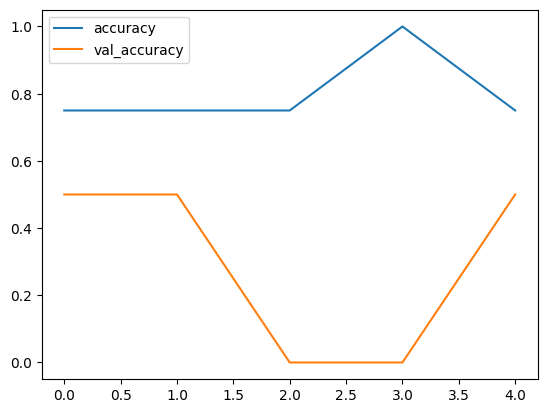

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

##  Plot training loss history

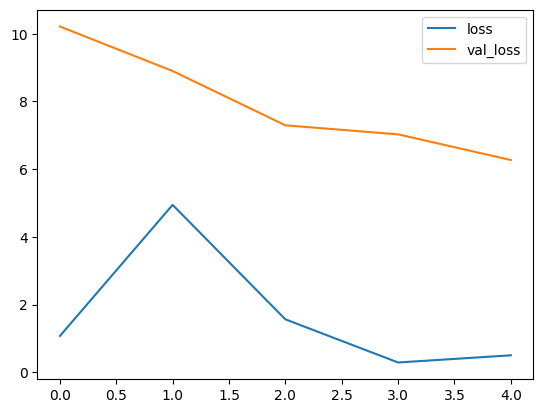

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()